In [11]:
import ipywidgets as widgets
import numpy as np

# 创建 12 个文本框，并将其输入内容关联到对应的数组元素
inputs1 = [widgets.Text(description=str(i)) for i in range(1, 13)]
kt = np.zeros(12)

def update_kt(sender):
    # 将数组元素更新为对应文本框的值，如果文本框内容为空，则默认为 0
    for i, inp in enumerate(inputs1):
        try:
            kt[i] = float(inp.value)
        except (ValueError, TypeError):
            kt[i] = 0

# 将 update_kt 函数绑定到每个文本框的 on_submit 事件上
for inp in inputs1:
    inp.observe(update_kt)

# 创建 Tab 控件，将 12 个文本框作为子控件，并设置标题为 "1" 到 "12"
tab_kt = widgets.Tab(children=inputs1, titles=[str(i) for i in range(1, 13)])

In [12]:
#### 创建 12 个文本框，并将其输入内容关联到对应的数组元素
inputs2 = [widgets.Text(description=str(i)) for i in range(1, 13)]
t = np.zeros(12)

def update_t(sender):
    # 将数组元素更新为对应文本框的值，如果文本框内容为空，则默认为 0
    for i, inp in enumerate(inputs2):
        try:
            t[i] = float(inp.value)
        except ValueError:
            t[i] = 0

# 将 update_kt 函数绑定到每个文本框的 on_submit 事件上
for inp in inputs2:
    inp.observe(update_t)

# 创建 Tab 控件，将 12 个文本框作为子控件，并设置标题为 "1" 到 "12"
tab_t = widgets.Tab(children=inputs2, titles=[str(i) for i in range(1, 13)])

In [13]:
'''选项卡和做好的表格相组合'''
accordion1 = widgets.Accordion()
accordion1.children = [tab_kt, tab_t]
accordion1.titles = ('请输入kt的值', '请输入t的值')
accordion1


Accordion(children=(Tab(children=(Text(value='', description='1'), Text(value='', description='2'), Text(value…

In [ ]:
'''下拉选项和做好的表格的组合'''
stack1 = widgets.Stack([tab_kt, tab_t], selected_index=0)
stack1
dropdown = widgets.Dropdown(options=['kt', 't'])
widgets.jslink((dropdown, 'index'), (stack1, 'selected_index'))
widgets.VBox([dropdown, stack1])


In [6]:
import matplotlib.pyplot as plt
from scipy import optimize as op
k0 = 2079    #反应前的电导率
a = 0.00927    #初始浓度

In [7]:
y = kt    #kt对(k0-kt)/t作图
x = (k0-kt)/t    #kt对(k0-kt)/t作图
x_group = x    #需要拟合的数据组
y_group = kt

C:\Users\QK\AppData\Local\Temp\ipykernel_48220\2262205485.py:2: RuntimeWarning: divide by zero encountered in true_divide
  x = (k0-kt)/t    #kt对(k0-kt)/t作图


In [8]:
def f_1(x, A, B):    #需要拟合的函数
    return A * x + B
A, B = op.curve_fit(f_1, x_group, y_group)[0]    #得到的返回的A,B的值
# 返回值
# popt: 数组，参数的最佳值，以使拟合值与真实值的平方残差之和最小。
# pcov: 二维阵列，popt的估计协方差。对角线提供参数估计的方差。

# popt1, pcov1 = curve_fit(f_1, x_group, y_group)
# A = popt1[0]
# B = popt1[1]

ValueError: array must not contain infs or NaNs

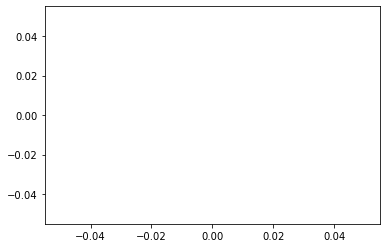

In [9]:
plt.scatter(x_group, y_group, marker='o', label='real')    #画出原始数据点
x = np.arange(20, 70, 1)    #产生横轴数据

# arrange函数用于创建一个在定义的起始值和结束值之间具有特定序列的数组
# 如下例
# np.arange(10, 35, 3)
# array([10, 13, 16, 19, 22, 25, 28, 31, 34])

In [10]:
y = A * x + B
plt.plot(x, y, color='red', label='curve_fit')    #绘制拟合图
plt.legend()    #标记的位置 默认根据图形自动匹配适合的位置
plt.title('拟合图')    #图标的名称
plt.xlabel("(k0-kt)/t")    #横坐标名称
plt.ylabel("kt")    #纵坐标名称
plt.rcParams['font.sans-serif'] = ['SimHei']    #使中文正常显示
plt.show()
k = 1/(a*A)
print(A)
print(k)

NameError: name 'A' is not defined